# Introdução

Este é um projeto de Ciência de Dados para prever a emissão de CO2 na atmosfera. Com base em dados anteriores, poderá ser previsto a emissão de outros veículos,  com base nos dados coletados. Sendo assim, será utilizado o modelo de Aprendizado de Máquina de regressão Múltipla. O modelo de Regressão Multipla é semelhante ao de regressão linear, sua diferença é que ele utiliza mais de uma variável, tornando assim o modelo mais eficaz.

### Autor: Rosinaldo Alves da Silva
Não é permitido Plágio - Crie seu Próprio Modelo

## Importação dos dados

In [3]:
# Utilizaremos a biblioteca pandas para importar os dados
import pandas as pd

df = pd.read_csv('carros.csv')

In [4]:
df.head(10)

,Car,Model,Volume,Weight,CO2
0,Toyoty,Aygo,1000,790,99
1,Mitsubishi,Space Star,1200,1160,95
2,Skoda,Citigo,1000,929,95
3,Fiat,500,900,865,90
4,Mini,Cooper,1500,1140,105
5,VW,Up!,1000,929,105
6,Skoda,Fabia,1400,1109,90
7,Mercedes,A-Class,1500,1365,92
8,Ford,Fiesta,1500,1112,98
9,Audi,A1,1600,1150,99


## Analise dos dados

In [5]:
df.describe()

,Volume,Weight,CO2
count,36.000000,36.000000,36.000000
mean,1611.111111,1292.277778,102.027778
std,388.975047,242.123889,7.454571
min,900.000000,790.000000,90.000000
25%,1475.000000,1117.250000,97.750000
50%,1600.000000,1329.000000,99.000000
75%,2000.000000,1418.250000,105.000000
max,2500.000000,1746.000000,120.000000


Podemos observar que esse é um conjunto de dados pequeno, afim apenas, para testes. Mas pode ser utilizado para prever a emissão de CO2 de alguns veículos. 

In [6]:
# O info() metodo, é adequado para verificar se existem dados faltantes ou células com dados errados.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 5 columns):
Car       36 non-null object
Model     36 non-null object
Volume    36 non-null int64
Weight    36 non-null int64
CO2       36 non-null int64
dtypes: int64(3), object(2)
memory usage: 1.2+ KB


Podemos observar que não existe dados nulos ou células vazias, assim não é necessário a limpeza dos dados.  

### Visualização das variáveis independentes com relação a variável dependente. 

Como esse modelo de Regressão Múltipla utiliza apenas dados numéricos, vamos utilizar as variáveis Volume do motor e peso do carro para as variáveis independentes e CO2 para a variável dependente.

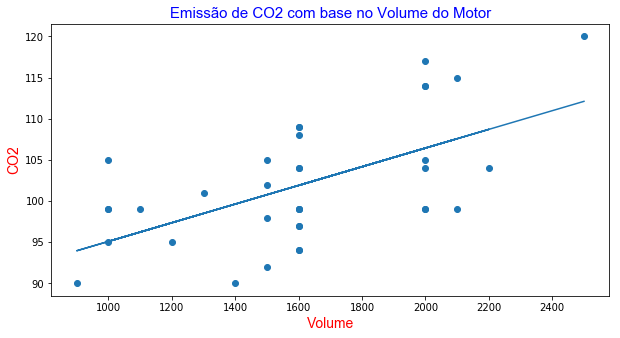

In [6]:
# plotagem com a biblioteca matplotlib.pyplot e a linha com o scipy.stats
import matplotlib.pyplot as plt
from scipy import stats

plt.figure(figsize=(10, 5))
# CO2 em relação ao Volume do motor 
v = df['Volume']
co2 = df['CO2']

font1 = {'fontfamily': 'Arial', 'color': 'blue', 'fontsize': 15}
font2 = {'fontfamily': 'Arial', 'color': 'red', 'fontsize': 14}

inclinacao, intercept, r, p, std_err = stats.linregress(v, co2)

def passoDados(v):
    return inclinacao * v + intercept

model = list(map(passoDados, v))

plt.scatter(v, co2)
plt.plot(v, model)
plt.title('Emissão de CO2 com base no Volume do Motor', fontdict = font1)
plt.xlabel('Volume', fontdict = font2)
plt.ylabel('CO2', fontdict = font2)
plt.show()


Com um gráfico de dispersão podemos observar que, quanto maior o volume do motor, maior é a emissão de CO2 na atmosfera. Também podemos observar como fica a linha de regressão em relação ao Volume do motor. 

In [73]:
# O relacionamento para essa variável fica em torno de 0.59:
print(r)

0.592081794691874


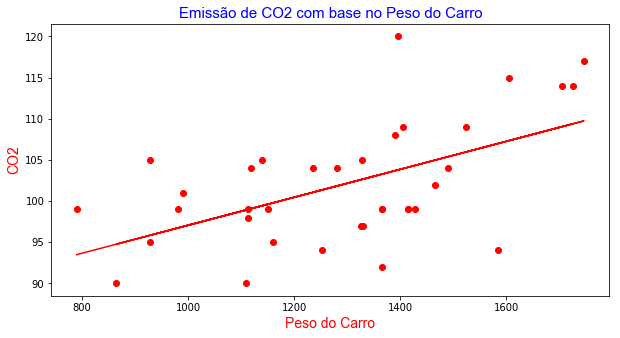

In [7]:
#CO2 em relação ao peso do carro, com a linha de regressão linear
plt.figure(figsize=(10, 5))
peso = df['Weight']
Co2P = df['CO2']

inclinacao1, intercept1, r1, p1, std_err1 = stats.linregress(peso, Co2P)

def passoDados2(peso):
    return inclinacao1 * peso + intercept1

model1 = list(map(passoDados2, peso))

plt.scatter(peso, Co2P, c = 'r')
plt.plot(peso, model1, color = 'red')
plt.title('Emissão de CO2 com base no Peso do Carro', fontdict = font1)
plt.xlabel('Peso do Carro', fontdict = font2)
plt.ylabel('CO2', fontdict = font2)
plt.show()

Com um gráfico de dispersão podemos observar que, quanto maior o Peso do carro, maior é a emissão de CO2 na atmosfera. Também podemos observar como fica a linha de regressão linear em relação aos dados de peso do carro. 

In [8]:
# O relacionamento para o peso do carro fica em torno de 0.55:
print(r1)

0.5521500341348635


> Como temos uma relação muito baixa, vamos utilizar o modelo de Regressão com mais de uma variável, assim o modelo vai se ajustar melhor aos dados. 

## Modelo com o linear_model.LinearRegression()

Para esse modelo, podemos utilizar mais de uma variável para melhorar a relação com a variável resposta.

In [84]:
#importação do linear_model do modulo sklearn
from sklearn import linear_model

X = df[['Weight', 'Volume']] #Variáveis dependentes
y = df['CO2'] # variável dependente ou alvo 

#Criação do objeto 
objr = linear_model.LinearRegression()

Como esse modelo só aceita numéros, vamos utilizar apenas as variáveis numéricas

### Separação dos dados em conjunto de treino e teste

In [85]:
from sklearn.model_selection import train_test_split

In [86]:
X_treino, X_teste, y_treino, y_teste,  = train_test_split(X, y, test_size = 0.2)

In [87]:
X_treino.shape

(28, 2)

In [88]:
X_teste.shape

(8, 2)

Podemos perceber que, ficamos com 27 variáveis para o treino e apenas 9 para o teste.

In [91]:
#chamada do metodo fit(), para treinar o modelo com todas as variáveis
objr.fit(X_treino, y_treino)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### Testando o modelo com os dados de teste

In [92]:
X_teste.head()

,Weight,Volume
2,929,1000
27,1725,2000
25,1465,1500
15,1330,1600
23,1415,1600


In [93]:
# Prevendo novos valores com os dados de teste
predicaoCO2 = objr.predict(X_teste)

In [94]:
print(predicaoCO2)

[ 95.13753713 107.52415224 102.24234888 102.06355532 102.62498906
 107.44443523 102.03713491 100.09569046]


Esses foram os novos valores previstos de CO2 com base nas variáveis de teste

### Avaliando o modelo com Coeficiente de Correlação 

In [95]:
print(objr.coef_)

[0.0066051  0.00712895]


Esses são os dois coeficientes de correlação, isso significa que, para cada quilo a mais no peso do carro vai aumentar aproximadamente 0.0067 no CO2 e para o volume, vai aumentar 0.0071 para cada cm³ a mais.

#### Exemplos com novos dados

In [96]:
pred = objr.predict([[2300, 1300]])
print(pred)

[106.33181908]


Nesse exemplo, previmos que, para o peso do carro de 2300kg e para o volume do motor de 1300cm³, previmos o CO2 de aproximadamente 106.33

In [97]:
import numpy as np
# prevendo novamente com o peso de 3300 e volume de 1600cm³
pred2 = objr.predict([[3300, 1600]])
print(np.around(pred2[0], 2))

115.08


Assim basta fazer as contas com relação a predição anterion

In [98]:
106.33 + (1000 * objr.coef_[0]) + (300 * objr.coef_[1])

115.0737888040396

Podemos observar que, o aumento do peso foi de 1000 e o volume foi de 300. Assim,  esses valores multiplicados pelos coeficientes equivalem ao novo resulta.

### Avaliando o modelo com métricas 

In [1]:
# Essa métrica untiliza o erro Quadrático Médio
from sklearn.metrics import mean_squared_error

In [99]:
eqm = mean_squared_error(y_teste, predicaoCO2)

In [100]:
print(np.around(eqm, 2))

23.41


O erro médio quadrado foi de 23.41, então temos um modelo que pode ser usado para prever emissão de CO2 para novos veículos, lembrado que, são poucos os dados,  então séria melhor com um conjunto de dados maior.

# Conclusão
Podemos concluir que, o uso da (regressão multipla) para múltiplas variáveis, pode ser aplicado para melhorar o modelo. No entanto, fica a critério de cada analista utilizar seus métodos  e conhecimentos de acordo com o conjunto de dados observado.